# MERFISH whole brain spatial transcriptomics (part 2b)

We can continue to explore our examples looking at the expression of canonical neurotransmitter transporter genes and gene Tac2 over the whole brain.

You need to be connected to the internet to run this notebook and that you have downloaded the example data via the getting started notebook.

In [623]:
import os
import pandas as pd
import numpy as np
import anndata
import time
import json
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
import requests
import seaborn as sns

%matplotlib inline

The prerequisite for running this notebook is that the data have been downloaded to local directory maintaining the organization from the manifest.json. **Change the download_base variable to where you have downloaded the data in your system.**

In [624]:
version = '20230830'
download_base = '/alzheimer/Roberto/Allen_Institute/abc_download_root'

use_local_cache = False
manifest_path = 'releases/%s/manifest.json' % version

if not use_local_cache :
    url = 'https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/' + manifest_path
    manifest = json.loads(requests.get(url).text)
else :
    file = os.path.join(download_base,manifest_path)
    with open(file,'rb') as f:
        manifest = json.load(f)
    
metadata = manifest['file_listing']['MERFISH-C57BL6J-638850']['metadata']

In [625]:
view_directory = os.path.join( download_base, 
                               manifest['directory_listing']['MERFISH-C57BL6J-638850']['directories']['metadata']['relative_path'], 
                              'views')
cache_views = False
if cache_views :
    os.makedirs( view_directory, exist_ok=True )

Read in the expanded cell metadata table we created in part 1.

In [604]:
rpath = metadata['cell_metadata_with_cluster_annotation']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath )
cell = pd.read_csv(file,dtype={"cell_label":str,"neurotransmitter":str})
cell.set_index('cell_label',inplace=True)

In [605]:
view_directory = os.path.join( download_base, 
                               manifest['directory_listing']['MERFISH-C57BL6J-638850-CCF']['directories']['metadata']['relative_path'], 
                              'views')
view_directory = pathlib.Path( view_directory )
cache_views = False
if cache_views :
    os.makedirs( view_directory, exist_ok=True )

metadata = manifest['file_listing']['MERFISH-C57BL6J-638850']['metadata']
rpath = metadata['cell_metadata_with_cluster_annotation']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cell = pd.read_csv(file,dtype={"cell_label":str})
cell.rename(columns={'x':'x_section','y':'y_section','z':'z_section'},inplace=True)
cell.set_index('cell_label',inplace=True)



metadata = manifest['file_listing']['MERFISH-C57BL6J-638850-CCF']['metadata']
rpath = metadata['reconstructed_coordinates']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
reconstructed_coords = pd.read_csv(file,dtype={"cell_label":str})
reconstructed_coords.rename(columns={'x':'x_reconstructed','y':'y_reconstructed','z':'z_reconstructed'},inplace=True)
reconstructed_coords.set_index('cell_label',inplace=True)
cell = cell.join(reconstructed_coords,how='inner')

In [606]:
metadata = manifest['file_listing']['Allen-CCF-2020']['metadata']
rpath = metadata['parcellation_to_parcellation_term_membership_acronym']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
parcellation_annotation = pd.read_csv(file)
parcellation_annotation.set_index('parcellation_index',inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
parcellation_annotation.head(5)

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
parcellation_index,,,,,
0,unassigned,unassigned,unassigned,unassigned,unassigned
1,brain,grey,HY,TMv,TMv
2,brain,grey,Isocortex,SSp-m,SSp-m6b
5,brain,fiber tracts,lfbs,cst,int
6,brain,grey,P,PSV,PSV


In [607]:
rpath = metadata['parcellation_to_parcellation_term_membership_color']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
parcellation_color = pd.read_csv(file)
parcellation_color.set_index('parcellation_index',inplace=True)
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns]
parcellation_color.head(5)

,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
parcellation_index,,,,,
0,#000000,#000000,#000000,#000000,#000000
1,#FFFFFF,#BFDAE3,#E64438,#FF4C3E,#FF4C3E
2,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
5,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
6,#FFFFFF,#BFDAE3,#FF9B88,#FFAE6F,#FFAE6F


In [608]:
cell = cell.join(parcellation_annotation,on='parcellation_index')
cell = cell.join(parcellation_color,on='parcellation_index')
cell.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,brain,grey,HPF,DG,DG-po,#FFFFFF,#BFDAE3,#7ED04B,#7ED04B,#7ED04B
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,brain,grey,P,TRN,TRN,#FFFFFF,#BFDAE3,#FF9B88,#FFBA86,#FFBA86
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,brain,fiber tracts,cbf,arb,arb,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88


Read in the gene expression dataframe we created in part 2a.

In [626]:
rpath = metadata['example_genes_all_cells_expression']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath )
exp = pd.read_csv(file,dtype={"cell_label":str})
exp.set_index('cell_label',inplace=True)

In [627]:
file

'/alzheimer/Roberto/Allen_Institute/abc_download_root/metadata/MERFISH-C57BL6J-638850/20230830/views/example_genes_all_cells_expression.csv'

We define a helper functions *aggregate_by_metadata* to compute the average expression for a given catergory.

In [614]:
def aggregate_by_metadata( df, gnames, value, sort=False ) :
    grouped = df.groupby(value)[gnames].mean()
    if sort :
        grouped = grouped.sort_values(by=gnames[0],ascending=False)
    return grouped

### Expression of canonical neurotransmitter transporter genes

During analysis, clusters were assigned neurotransmitter identities based on the expression of of canonical neurotransmitter transporter genes. In this example, we create a dataframe comprising of expression of the 9 solute carrier family genes for all the cells in the dataset.  We then group the cells by the assigned neurotransmitter class and compute the mean expression for each group and visualized as a colorized table.

The results are similar that in part 1. Using data from the whole brain, gene Slc17a7 is now most enriched in glutamatergic assigned cells. Gene Slc17a6 is most enriched in noradrenergic, then cholinergic types. Genes Slc6a5, Slc6a3 and Slc6a4 shows high specificity to glycinergic, dopaminergic, serotonergic respectively.

In [615]:
def plot_heatmap( df, fig_width = 8, fig_height = 4, cmap=plt.cm.magma_r, vmin=0, vmax=5) :

    arr = df.to_numpy()

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width,fig_height)

    res = ax.imshow(arr, cmap = cmap, aspect='auto', vmin=vmin, vmax=vmax)
    xlabs = df.columns.values
    ylabs = df.index.values

    ax.set_xticks(range(len(xlabs)))
    ax.set_xticklabels( xlabs )

    ax.set_yticks(range(len(ylabs)))
    res = ax.set_yticklabels( ylabs )

We define a small helper function *plot sections* to visualize the cells for a specified set of brain sections either by colorized metadata or gene expression.

In [617]:
def plot_sections( df, feature, blist, cmap=None, fig_width = 20, fig_height = 5, vmin=0, vmax=10) :
    
    fig, ax = plt.subplots(1,len(blist))
    fig.set_size_inches(fig_width, fig_height)
    
    for idx,bsl in enumerate(blist) :
        
        filtered = df[df['brain_section_label'] == bsl]
        xx = filtered['x_reconstructed']
        yy = filtered['y_reconstructed']
        vv = filtered[feature]
        
        if cmap is not None :
            ax[idx].scatter(xx,yy,s=1.0,c=vv,marker='.',cmap=cmap)
        else :
            ax[idx].scatter(xx,yy,s=1.0,color=vv,marker=".")
            
        ax[idx].axis('equal')
        ax[idx].set_xlim(0,11)
        ax[idx].set_ylim(11,0)
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        
        ax[idx].set_title("%s" % (bsl) )
        
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    return fig, ax
    

In [618]:
def plot_section_CCF(  xx=None, yy=None, cc=None, val=None, pcmap=None, 
                 overlay=None, extent=None, bcmap=plt.cm.Greys_r, alpha=1.0,s=.5,
                 fig_width = 6, fig_height = 6, fig=None, ax=None ) :
    
    if ax is None:
        fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)


    
    if xx is not None and yy is not None and pcmap is not None :
        ax.scatter(xx,yy,s=s,c=val,marker='.',cmap=pcmap, alpha=alpha)
    elif xx is not None and yy is not None and cc is not None :
        ax.scatter(xx,yy,s=s,color=cc,marker='.',zorder=1, alpha=alpha)   
        
    if overlay is not None and extent is not None and bcmap is not None :
        plt.imshow(overlay, cmap=bcmap, extent=extent,alpha=alpha,zorder=2)
        
    ax.set_ylim(11,0)
    ax.set_xlim(0,11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

We will use the aggregate by brain section table above to pick a four sections of interest and plot cells in those sections by neurotransmitter type and by each of the transporter genes.

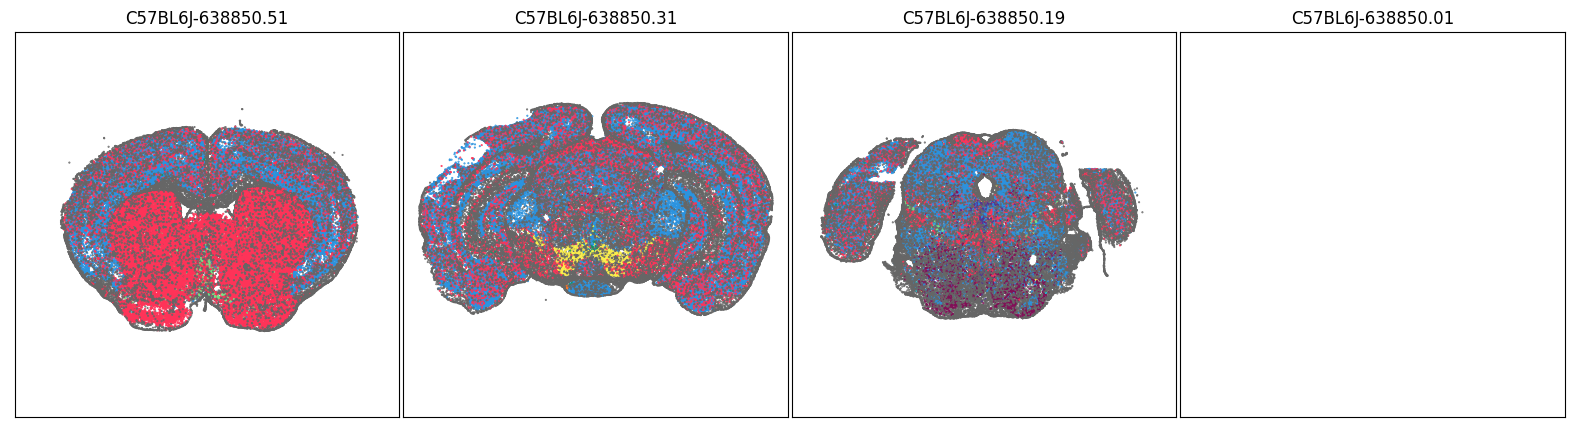

In [619]:
blist = ['C57BL6J-638850.51','C57BL6J-638850.31','C57BL6J-638850.19','C57BL6J-638850.01']
fig, ax = plot_sections( joined, 'neurotransmitter_color', blist, cmap=None)

### Expression of Tachykinin 2 (Tac2) in the whole brain

In mice, the tachykinin 2 (Tac2) gene encodes neuropeptide called neurokinin B (NkB). Tac2 is produced by neurons in specific regions of the brain know to be invovled in emotion and social behavior. Based on [ISH data](https://mouse.brain-map.org/experiment/siv?id=77279001&imageId=77284584&initImage=ish&coordSystem=pixel&x=5384.5&y=3832.5&z=3) from the Allen Mouse Brain Atlas, Tac 2 is sparsely expressed in the mouse isocortex and densely enriched is specific subcortical regions such the medial habenula (MH), the amygdala and hypothalamus.

In this example, we create a dataframe comprising expression values of Tac2 for all cells across the whole brain. As with the single brain section example, grouping expression by neurotransmitter show that Tac2 gene is enriched in cholinergic cell types. With the rest of brain included, we can observe that Tac2 is also enriched in Glut-GABA cell types as well.

<AxesSubplot:>

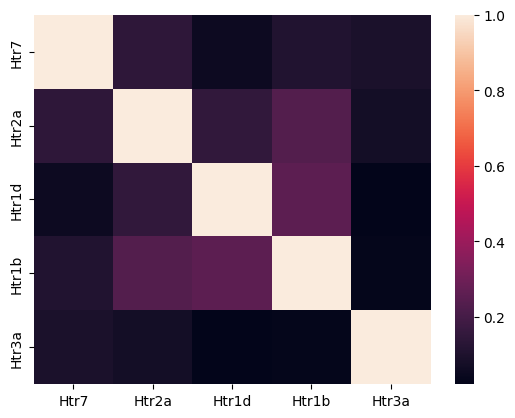

In [638]:
sns.heatmap(exp.corr())

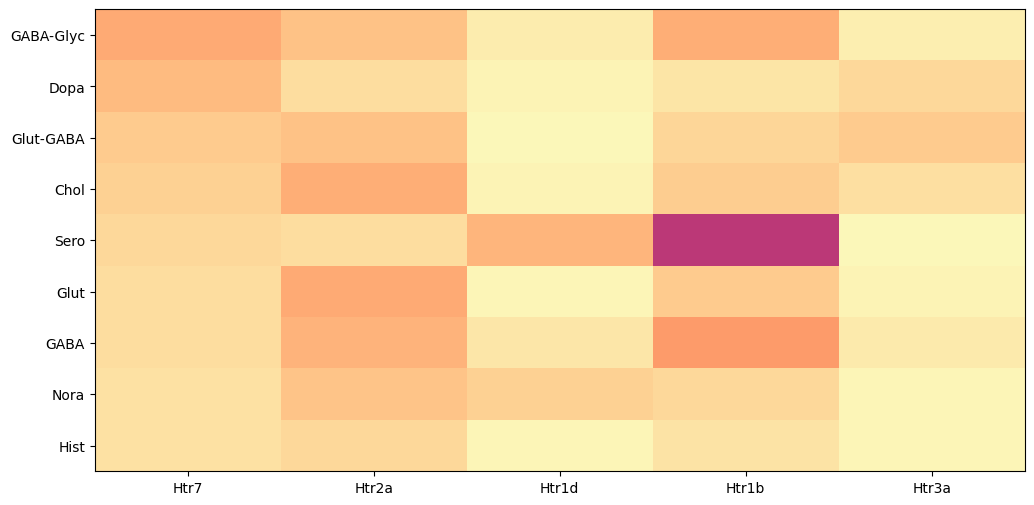

In [659]:
exgenes = exp.columns
filtered = exp[exgenes]
joined = cell.join( filtered )
agg = aggregate_by_metadata( joined, exgenes, 'neurotransmitter', True )
plot_heatmap(agg,12,6)

In [658]:
agg

,Htr7,Htr2a,Htr1d,Htr1b,Htr3a
neurotransmitter,,,,,
GABA-Glyc,0.892042,0.626116,0.181505,0.855613,0.159068
Dopa,0.714702,0.347214,0.109533,0.257989,0.394156
Glut-GABA,0.535751,0.632136,0.077714,0.428327,0.542141
Chol,0.477986,0.843158,0.098220,0.519922,0.317686
Sero,0.397254,0.340483,0.763565,2.428210,0.074240
Glut,0.347664,0.894821,0.086077,0.543314,0.099446
GABA,0.341766,0.794740,0.249244,1.043829,0.206541
Nora,0.304132,0.624830,0.484660,0.396208,0.088780
Hist,0.303713,0.398378,0.079964,0.286993,0.096093


Grouping by class, shows that Tac2 is enriched in class "16 MH-LH Glut" with cells restricted to the medial (MH) and lateral (LH) habenula and a mixture of glutamatergic and cholinergic type and "06 CTX-CGE GABA" GABAergic cells originating from the caudal ganglionic eminence (CGE).

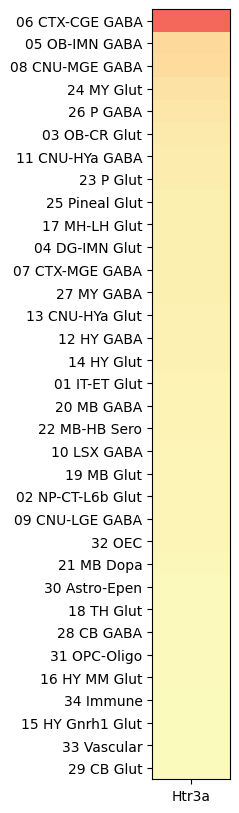

In [640]:
agg = aggregate_by_metadata( joined, exgenes, 'class', True )
class_list = agg.index[0:2]
plot_heatmap(agg,1,10)

At the next level, grouping by subclass reveals enrichment is highly anatomically localized cell types such as the medial habenula (MH), bed nuclei of the stria terminalis (BST), spinal nucleus of the trigeminal (SPVC), main olfactory blub (MOB), central amygdalar nucleus (CEA) and arcuate hypothalamic nucleus (ARH).

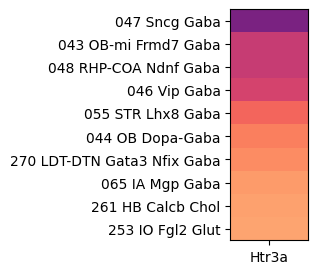

In [642]:
agg = aggregate_by_metadata( joined, exgenes, 'subclass', True ).head(10)
subclass_list = agg.index[0:10]
plot_heatmap(agg,1,3)

In [134]:
aggregate_by_metadata( joined, exgenes, 'cluster', True ).quantile(.9)

Htr2a    1.561949
Name: 0.9, dtype: float64

In [167]:
all.index.to_series().str.extract(r' ([a-zA-Z\-]+)_')[0]

cluster
0175 IT AON-TT-DP Glut_3                       Glut
2030 COAa-PAA-MEA Barhl2 Glut_3                Glut
4601 HB Calcb Chol_1                           Chol
0406 L6b EPd Glut_2                            Glut
2025 COAa-PAA-MEA Barhl2 Glut_2                Glut
                                             ...   
4530 NTS Dbh Glut_1                            Glut
4497 MV-SPIV Zic4 Neurod2 Glut_1               Glut
3657 LGv-SPFp-SPFm Nkx2-2 Tcf7l2 Gaba_4        Gaba
3859 SNc-VTA-RAmb Foxa1 Dopa_3                 Dopa
5080 NTS-PARN Neurod2 Gly-Gaba_1           Gly-Gaba
Name: 0, Length: 5320, dtype: object

In [644]:
level = "cluster"
all = aggregate_by_metadata( joined, exgenes, level, True )

In [645]:
labels = all.index.to_series().str.extract(r' ([a-zA-Z\-]+)_')[0]
# Build regex pattern for extraction
pattern = r'(?i)(' + '|'.join(labels) + ')'

all["neurotransmitter"] = all.index.to_series().str.extract(pattern)[0]
all["Neuron type"] = all.index.to_series().str.extract(r'(Pv|Sst|Vip|Glut)')

0.3442767930427237

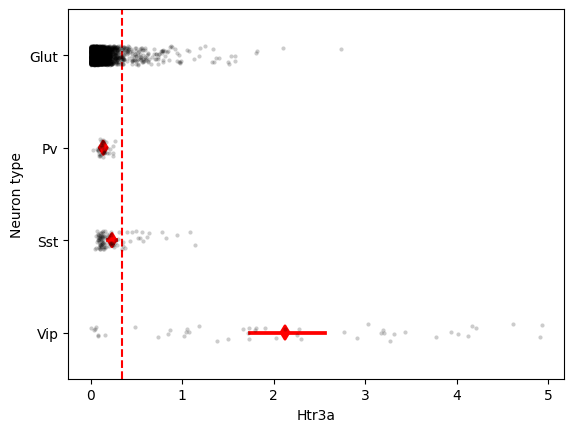

In [647]:
order= ["Glut", "Pv", "Sst", "Vip"] 
sns.stripplot(data=all, x="Htr3a", y="Neuron type", color="k", alpha=.2, order=order, s=3)
sns.pointplot(data=all, x="Htr3a", y="Neuron type", join=False, dodge=.2,
    markers="d", order=order, color="r" )
plt.axvline(x=aggregate_by_metadata(joined, exgenes, level, True ).quantile(.9)[0], color='r', linestyle='--')
aggregate_by_metadata( joined, exgenes, level, True ).quantile(.9)[0]

<AxesSubplot:xlabel='Htr3a', ylabel='Neuron type'>

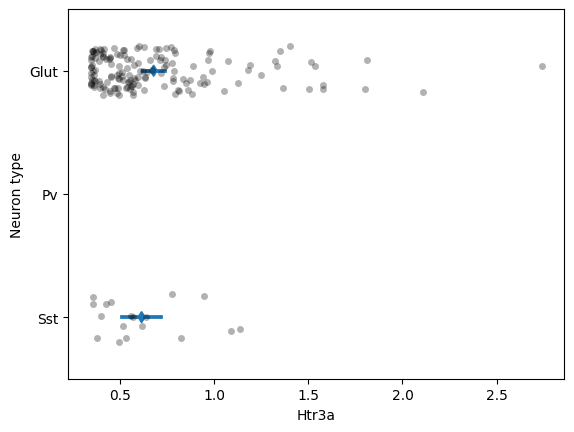

In [649]:
order= ["Glut", "Pv", "Sst"] 
top_all = all[all["Htr3a"]>aggregate_by_metadata( joined, exgenes, level, True ).quantile(.9)[0]]
sns.stripplot(data=top_all, x="Htr3a", y="Neuron type", color="k", alpha=.3 , order=order)
sns.pointplot(data=top_all, x="Htr3a", y="Neuron type", join=False, order=order, dodge=.8 - .8 / 3,
    markers="d", scale=.75)

In [526]:
top_all[top_all["Neuron type"]=="Sst"]

,Htr2a,neurotransmitter,Neuron type
cluster,,,
0824 Sst Gaba_17,3.219005,Gaba,Sst
0828 Sst Gaba_19,2.898836,Gaba,Sst
0808 Sst Gaba_12,2.625624,Gaba,Sst
0759 Sst Gaba_1,2.592625,Gaba,Sst
0809 Sst Gaba_12,2.504341,Gaba,Sst
0758 Sst Gaba_1,2.431334,Gaba,Sst
0823 Sst Gaba_17,2.314557,Gaba,Sst
0822 Sst Gaba_17,2.123355,Gaba,Sst
0761 Sst Gaba_1,2.070437,Gaba,Sst


<AxesSubplot:ylabel='parcellation_division'>

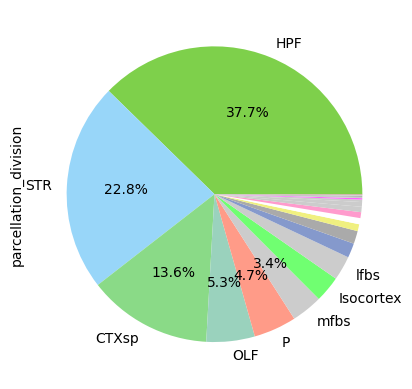

In [650]:
color_map = dict(zip(cell["parcellation_division"], cell["parcellation_division_color"].apply(plt_colors.to_rgba)))

# Custom function for autopct
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues))
    if pct < 3: 
        return ""
    else:
        return "{:.1f}%".format(pct, absolute)

labels = cell[cell["cluster"].isin(top_all[top_all["Neuron type"]=="Sst"].index)]["parcellation_division"].value_counts()

total = labels.sum()
percentages = labels / total * 100

labels_renamed = labels.copy()
# Replace labels with a percentage less than 1% to ''
labels_renamed.index = [index if percent >= 2 else '' for index, percent in percentages.items()]

labels_renamed.plot(kind='pie', autopct=lambda pct: func(pct, cell["parcellation_division"].value_counts()), colors=[color_map[key] for key in labels.index])

<AxesSubplot:ylabel='parcellation_structure'>

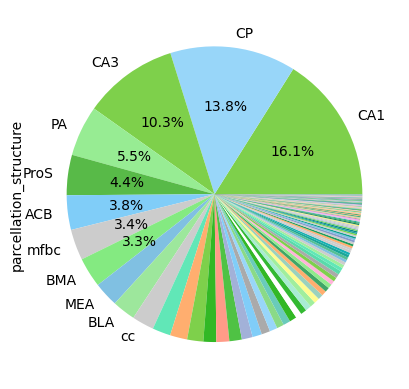

In [652]:
color_map = dict(zip(cell["parcellation_structure"], cell["parcellation_structure_color"].apply(plt_colors.to_rgba)))

# Custom function for autopct
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues))
    if pct < 3: 
        return ""
    else:
        return "{:.1f}%".format(pct, absolute)

labels = cell[cell["cluster"].isin(top_all[top_all["Neuron type"]=="Sst"].index)]["parcellation_structure"].value_counts()

total = labels.sum()
percentages = labels / total * 100

labels_renamed = labels.copy()
# Replace labels with a percentage less than 1% to ''
labels_renamed.index = [index if percent >= 2 else '' for index, percent in percentages.items()]

labels_renamed.plot(kind='pie', autopct=lambda pct: func(pct, cell["parcellation_structure"].value_counts()), colors=[color_map[key] for key in labels.index])

<AxesSubplot:xlabel='cluster'>

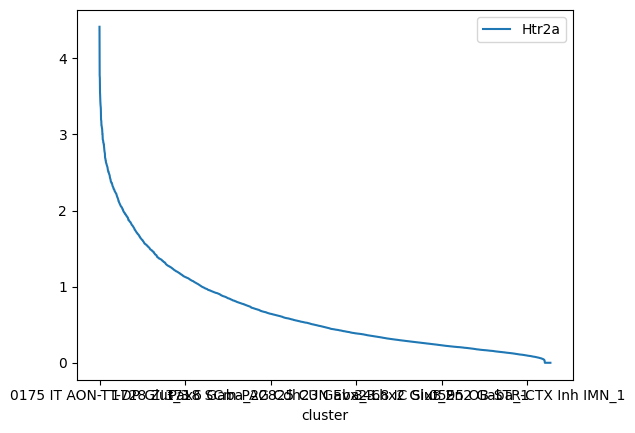

In [352]:
_ = aggregate_by_metadata( joined, exgenes,level , True )

_.plot()


In [353]:
_ = aggregate_by_metadata( joined, exgenes,level , True )
_ = _[_.index.str.contains('Pv')]

_.head(20)

,Htr2a
cluster,
0748 Pvalb Gaba_5,2.521657
0741 Pvalb Gaba_3,2.318606
0738 Pvalb Gaba_2,2.315621
0750 Pvalb Gaba_5,2.281256
0754 Pvalb Gaba_8,2.254617
0744 Pvalb Gaba_4,2.132242
0745 Pvalb Gaba_4,2.082320
0751 Pvalb Gaba_6,1.961558
0743 Pvalb Gaba_4,1.852599


In [69]:
cluster_list = _[:19].index

The MERFISH data allows us to visualize these spatial pattern in anatomical context. We can aggregate Tac2 expression by brain section so that we can find 4 sections where the enriched expression is located. We then visualize cells in those section by Tac2 expression, neurotransmitter identity, cell type classes and subclasses. 

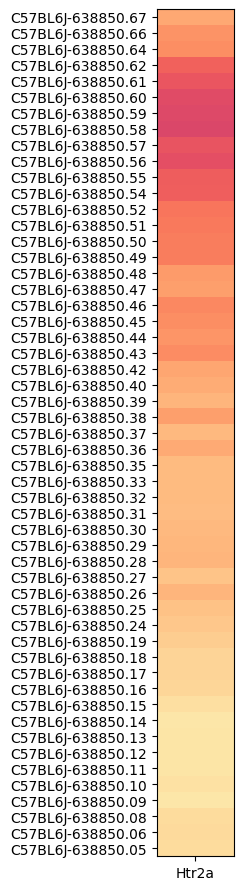

In [383]:
agg = aggregate_by_metadata( joined, exgenes, 'brain_section_label', False )
agg = agg.loc[list(reversed(list(agg.index)))]
plot_heatmap(agg,1,11, vmax=3)

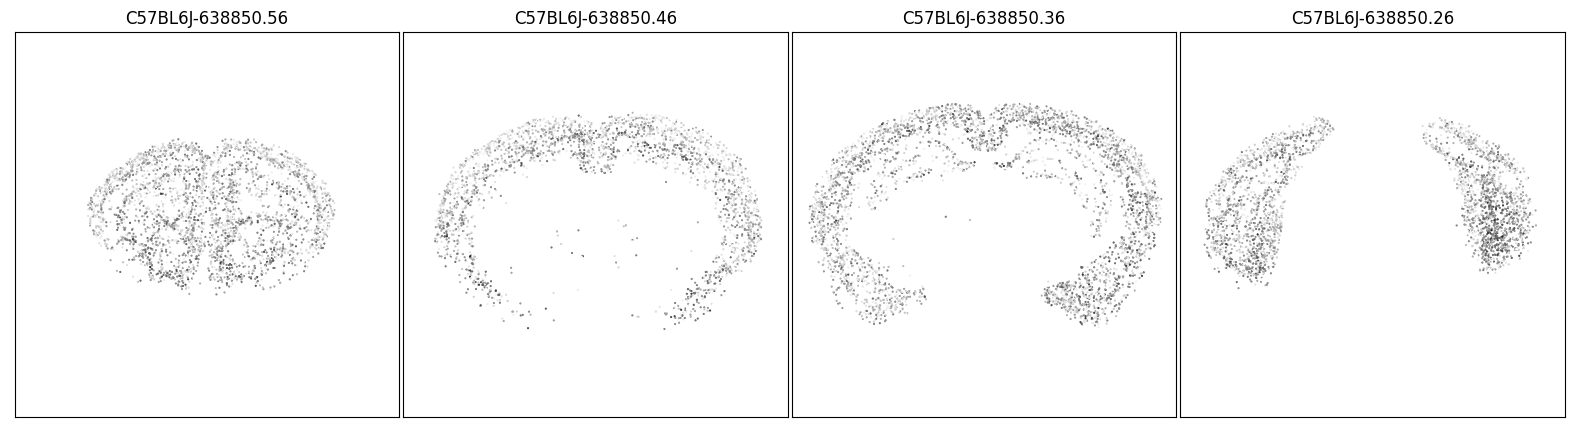

In [421]:
blist = ['C57BL6J-638850.56','C57BL6J-638850.46','C57BL6J-638850.36','C57BL6J-638850.26']
fig, ax = plot_sections( joined[joined["class"].isin(['07 CTX-MGE GABA',  '06 CTX-CGE GABA'])], 'Htr2a', blist, cmap=plt.cm.Greys, vmin=0,vmax=5)

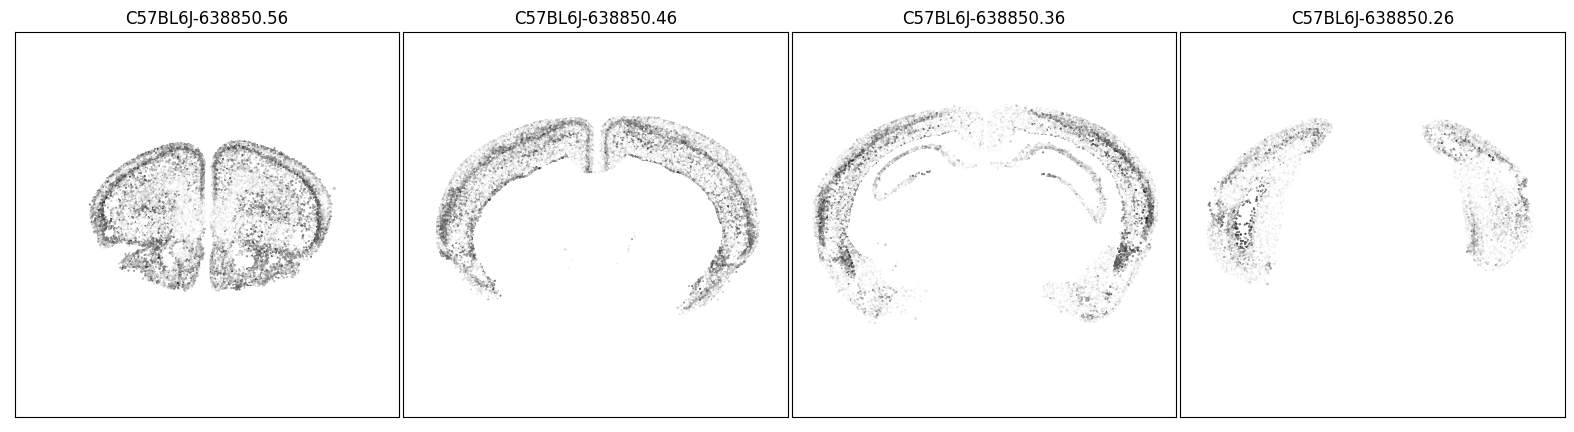

In [430]:

fig, ax = plot_sections( joined[joined["class"].isin([ '02 NP-CT-L6b Glut',  '01 IT-ET Glut'])], 'Htr2a', blist, cmap=plt.cm.Greys, vmin=0,vmax=5)

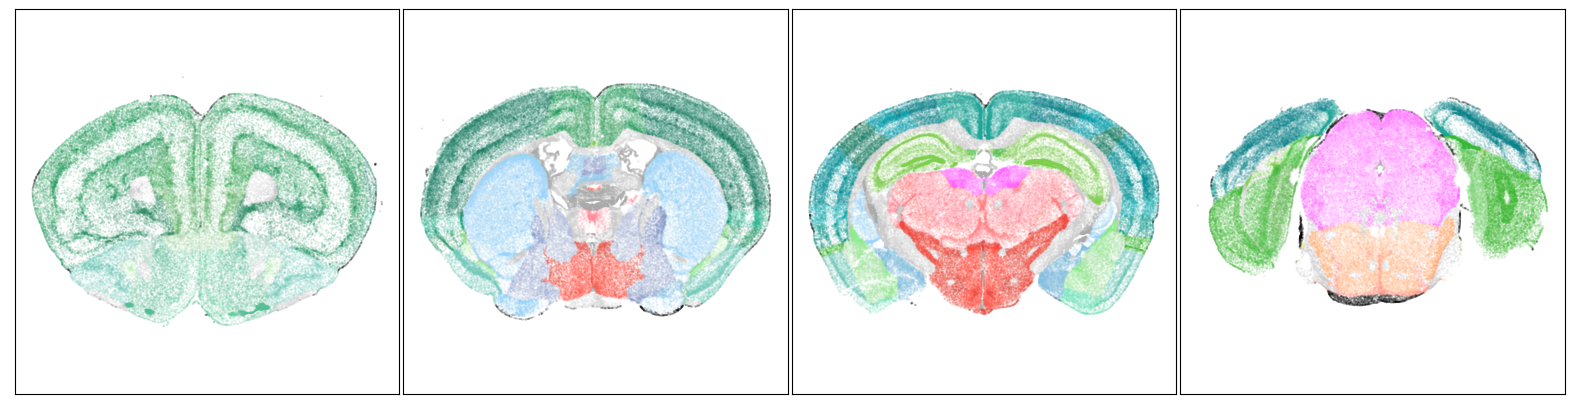

In [462]:
fig, axs = plt.subplots(1,len(blist))
fig_width = 20
fig_height = 5


for n, slice in enumerate(blist):
    pred = (cell['brain_section_label'] == slice )
    section = cell[pred]
    plot_section_CCF(xx=section['x_reconstructed'], yy=section['y_reconstructed'], 
                               cc=section['parcellation_structure_color'], alpha=.2, fig=fig, ax=axs[n])
plt.subplots_adjust(wspace=0.01, hspace=0.01)
fig.set_size_inches(fig_width, fig_height)

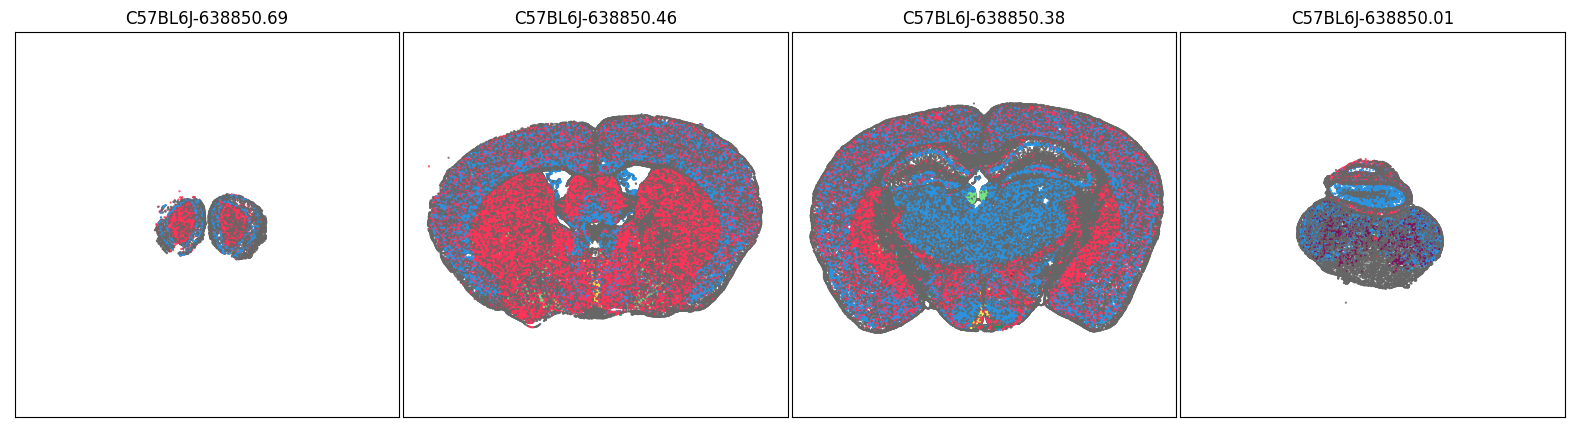

In [33]:
fig, ax = plot_sections( joined, 'neurotransmitter_color', blist, cmap=None)

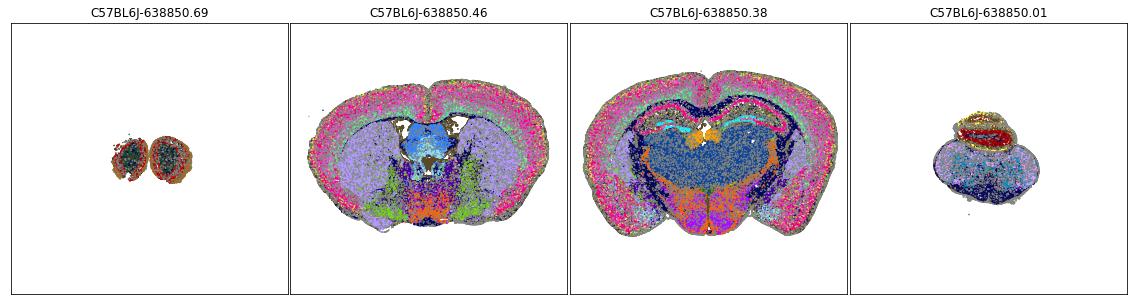

In [27]:
fig, ax = plot_sections( joined, 'class_color', blist, cmap=None)

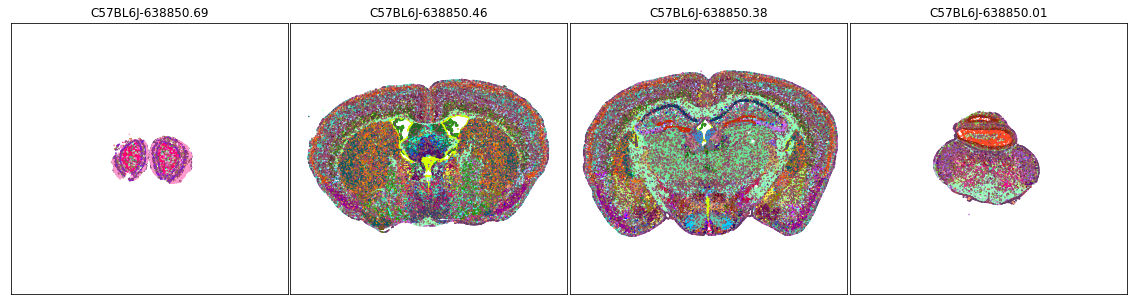

In [28]:
fig, ax = plot_sections( joined, 'subclass_color', blist, cmap=None)

We can use the Tac2 aggregate by subclass table above and pick out the top 10 most enriched subclasses and plot only them on the same set of brain sections and observed that this set of subclasses is able recapitulate the expression pattern of Tac2.

In [251]:
top_all[top_all.index.str.contains('Sst')].index

Index(['0232 Sst Gaba_19', '0230 Sst Gaba_17', '0225 Sst Gaba_12',
       '0214 Sst Gaba_1', '0228 Sst Gaba_15', '0231 Sst Gaba_18'],
      dtype='object', name='supertype')

In [262]:
top_all

,Htr2a,neurotransmitter,Gaba type
supertype,,,
1025 HB Calcb Chol_1,3.828012,Chol,NaN
0104 L6b EPd Glut_2,3.634355,Glut,NaN
0514 COAa-PAA-MEA Barhl2 Glut_6,3.347684,Glut,NaN
0001 CLA-EPd-CTX Car3 Glut_1,3.051559,Glut,NaN
0093 L5 ET CTX Glut_4,3.015978,Glut,NaN
...,...,...,...
0269 STR D1 Gaba_5,1.462046,Gaba,NaN
1135 NTS-PARN Neurod2 Gly-Gaba_6,1.457194,Gly-Gaba,NaN
0342 MEA-BST Sox6 Gaba_6,1.447340,Gaba,NaN


In [279]:
def plot_sections( df, feature, blist, cmap=None, fig_width = 20, fig_height = 5) :
    
    fig, ax = plt.subplots(1,len(blist))
    fig.set_size_inches(fig_width, fig_height)
    
    for idx,bsl in enumerate(blist) :
        
        filtered = df[df['brain_section_label'] == bsl]
        xx = filtered['x_reconstructed']
        yy = filtered['y_reconstructed']
        vv = filtered[feature]
        
        if cmap is not None :
            ax[idx].scatter(xx,yy,s=1.0,c=vv,marker='.',cmap=cmap)
        else :
            ax[idx].scatter(xx,yy,s=1.0,color=vv,marker=".")
            
        ax[idx].axis('equal')
        ax[idx].set_xlim(0,11)
        ax[idx].set_ylim(11,0)
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        
        ax[idx].set_title("%s" % (bsl) )
        
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    return fig, ax
    

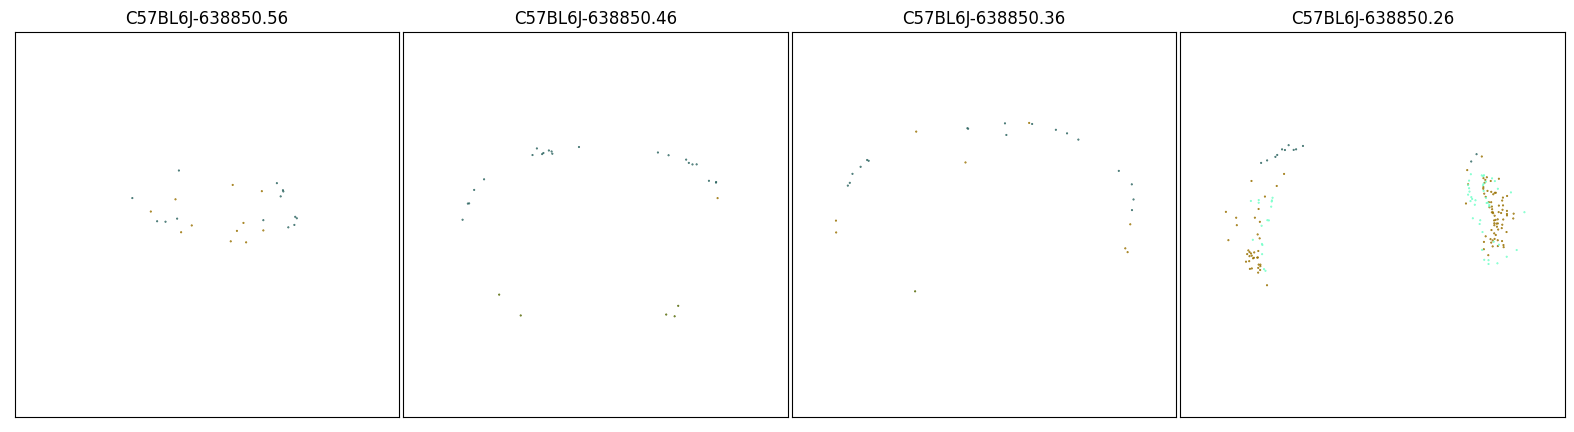

In [426]:
subclass_list = top_all[top_all.index.str.contains('Sst')].index


blist = ['C57BL6J-638850.56','C57BL6J-638850.46','C57BL6J-638850.36','C57BL6J-638850.26']
pred = [x in subclass_list for x in joined[level]]
filtered = joined[pred]
fig, ax = plot_sections( filtered, 'supertype_color', blist, cmap=None)

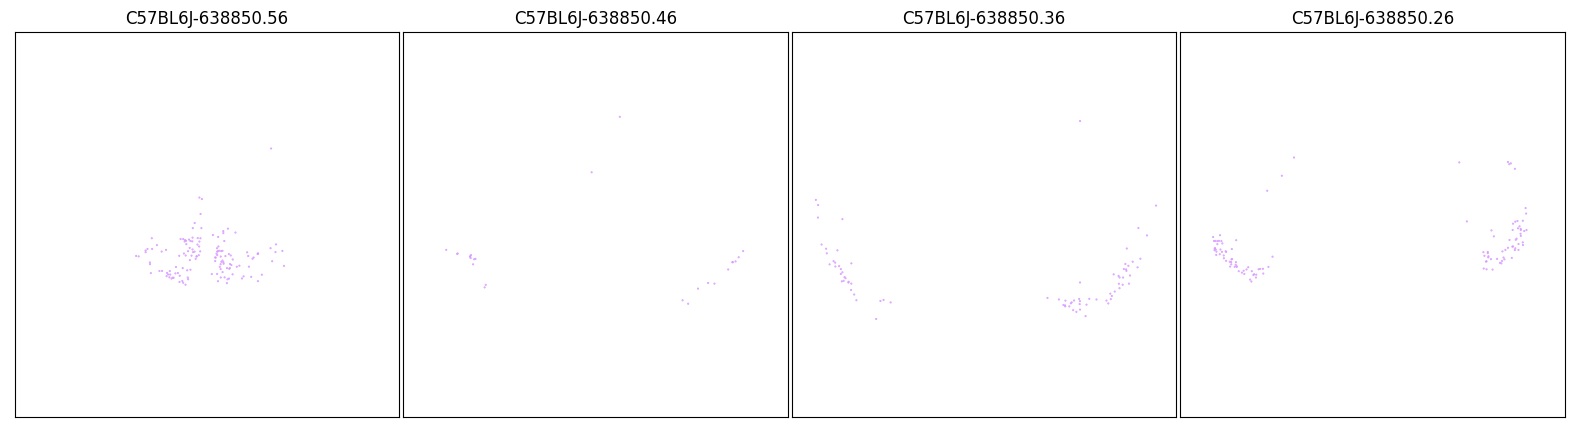

In [425]:
subclass_list = top_all[top_all.index.str.contains('Pv')].index


blist = ['C57BL6J-638850.56','C57BL6J-638850.46','C57BL6J-638850.36','C57BL6J-638850.26']
pred = [x in subclass_list for x in joined[level]]
filtered = joined[pred]
fig, ax = plot_sections( filtered, 'supertype_color', blist, cmap=None)

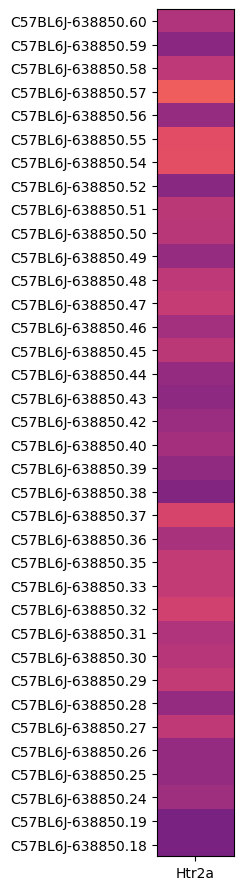

In [424]:
agg = aggregate_by_metadata( filtered, exgenes, 'brain_section_label', False )
agg = agg.loc[list(reversed(list(agg.index)))]
plot_heatmap(agg,1,11, vmax=5)

In [466]:
brain_section = 'C57BL6J-638850.26'
pred = (filtered['brain_section_label'] == brain_section )
section_target = filtered[pred]


In [467]:

pred = (cell['brain_section_label'] == brain_section )
section = cell[pred]
print(len(section))

79307


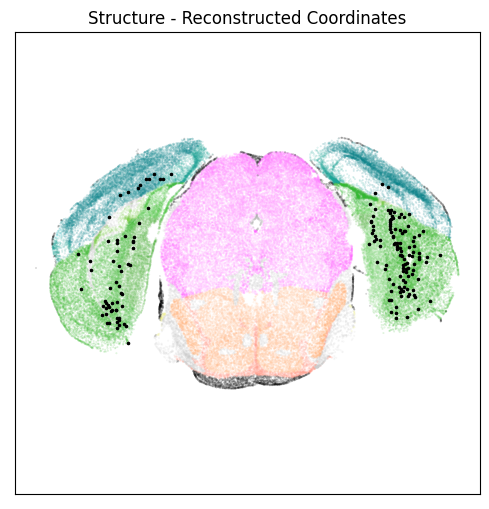

In [468]:
fig, ax = plot_section_CCF(xx=section['x_reconstructed'], yy=section['y_reconstructed'], 
                               cc=section['parcellation_structure_color'], alpha=.2)

fig, ax = plot_section_CCF(xx=section_target['x_reconstructed'], yy=section_target['y_reconstructed'], 
                               cc="k", fig=fig, ax=ax, s=10)

res = ax.set_title("Structure - Reconstructed Coordinates")